# SubbeamNOD KPFA Data  - testing

In [16]:
from dysh.spectra.spectrum import Spectrum
import numpy as np
from scipy.stats import norm
import astropy.units as u
import matplotlib.pyplot as plt
from dysh.fits.sdfitsload import SDFITSLoad
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.spectra.scan import PSScan, GBTPSScan
from copy import deepcopy
from astropy.modeling.fitting import LevMarLSQFitter,LinearLSQFitter
from specutils import Spectrum1D, SpectrumList,SpectralRegion
from astropy.nddata import StdDevUncertainty
from specutils.fitting import fit_continuum
import matplotlib.pyplot as plt
from dysh.spectra import dcmeantsys,tsys_weight,average
from dysh.util import sq_weighted_avg
from dysh.plot.specplot import SpectrumPlot
from astropy.io import fits
from astropy.table import Table
import pandas as pd
pd.set_option('display.max_rows', 100)
from astropy.utils.data import get_pkg_data_filename


In [17]:
datadir = "/data/gbt/"  # sub in your own path here
f = datadir + 'examples/subbeamnod-Ka/data/TRCO_230413_Ka.raw.vegas/TRCO_230413_Ka.raw.vegas.A.fits'
pnod = GBTFITSLoad(f)
pnod.info()
pnod.summary()

Filename: /data/gbt/examples/subbeamnod-Ka/data/TRCO_230413_Ka.raw.vegas/TRCO_230413_Ka.raw.vegas.A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  SINGLE DISH    1 BinTableHDU    245   5280R x 74C   ['32A', '1D', '22A', '1D', '1D', '1D', '1024E', '16A', '6A', '8A', '1D', '1D', '1D', '4A', '1D', '4A', '1D', '1I', '32A', '32A', '1J', '32A', '16A', '1E', '8A', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '8A', '1D', '1D', '12A', '1I', '1I', '1D', '1D', '1I', '1A', '1I', '1I', '16A', '16A', '1J', '1J', '22A', '1D', '1D', '1I', '1A', '1D', '1E', '1D', '1D', '1D', '1D', '1D', '1A', '1A', '8A', '1E', '1E', '16A', '1I', '1I', '1I']   


,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,32.0,1256-0547,0.0,Nod,1.0,26.5,26.5,1,2,30,2,160.975324,43.884984
1,33.0,1256-0547,0.0,Nod,2.0,26.5,26.5,1,2,30,2,161.174093,43.928449
2,34.0,1256-0547,0.0,Nod,1.0,30.5,30.5,1,2,30,2,161.589629,44.000491
3,35.0,1256-0547,0.0,Nod,2.0,30.5,30.5,1,2,30,2,161.783395,44.041622
4,36.0,1256-0547,0.0,Unknown,0.0,0.75,0.75,1,2,120,2,162.124052,44.100404
5,37.0,1256-0547,0.0,Nod,1.0,34.5,34.5,1,2,30,2,162.611075,44.183661
6,38.0,1256-0547,0.0,Nod,2.0,34.5,34.5,1,2,30,2,162.896506,44.237997
7,39.0,1256-0547,0.0,Nod,1.0,37.5,37.5,1,2,30,2,163.333508,44.306385
8,40.0,1256-0547,0.0,Nod,2.0,37.5,37.5,1,2,30,2,163.529285,44.343704
9,41.0,1256-0547,0.0,Nod,1.0,30.5,30.5,1,2,30,2,164.941425,44.559629


dtype('float64')

## The SNODKA data for scan 43 with tsys weighting
snokda,43,ifnum=0,fdnum=1

In [3]:
ifnum=0
plnum=0
fdnum=1
scan=43
bintable=0
weights='tsys'
cal=None
sig=None

In [4]:
# this assumes $PWD is /home/dysh
fn=get_pkg_data_filename("src/dysh/spectra/tests/data/TRCO_230413_Ka_snodka_43_ifnum_0_plnum_0_fdnum_1.fits")


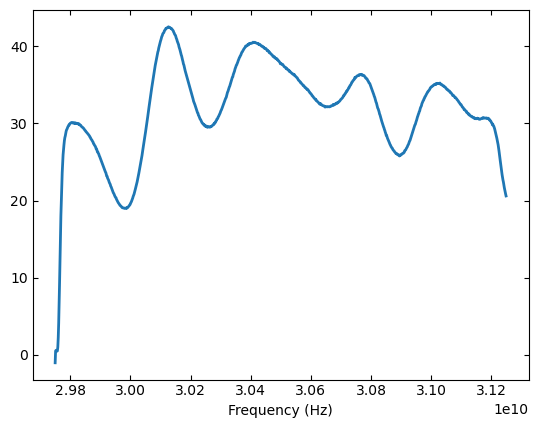

In [5]:
gbt = GBTFITSLoad(fn)
idlsnod=gbt.getspec(0)
idlsnod.plot()

In [6]:
dyshnod=pnod.subbeamnod(scan=scan,ifnum=ifnum,plnum=plnum,fdnum=fdnum,weights=weights,calibrate=True)
dyshnod._unit = u.ct ## need to fix this in code

TPSCAN nrows = 96
# scanrows 96, # calrows ON 48  # calrows OFF 48
TPSCAN nrows = 92
# scanrows 92, # calrows ON 46  # calrows OFF 46
TPSCAN nrows = 240
# scanrows 240, # calrows ON 120  # calrows OFF 120


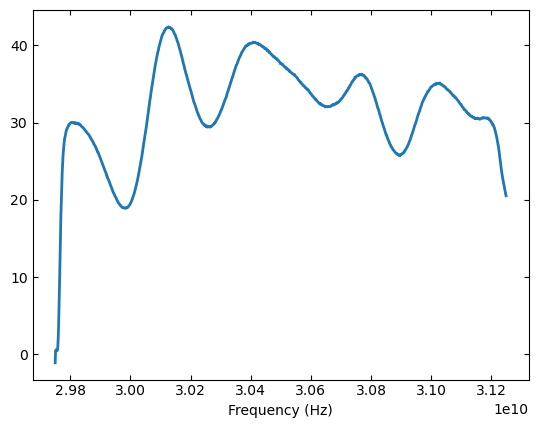

In [7]:
dyshnod.plot()

In [8]:
np.all(dyshnod.spectral_axis == idlsnod.spectral_axis) # freq axis is the same

True

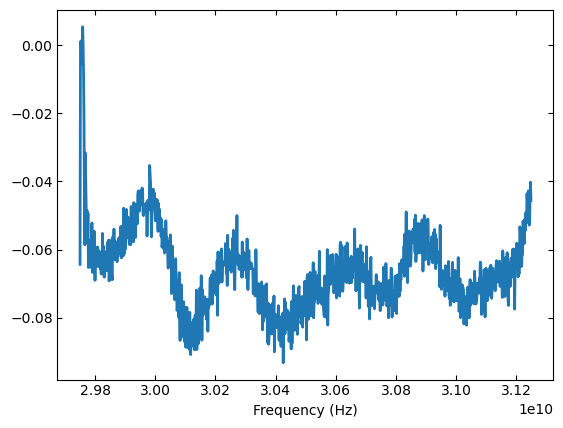

-0.0672378395081914

In [9]:
# difference plot
diff = dyshnod-idlsnod
diff.plot()
np.nanmedian(diff.data)

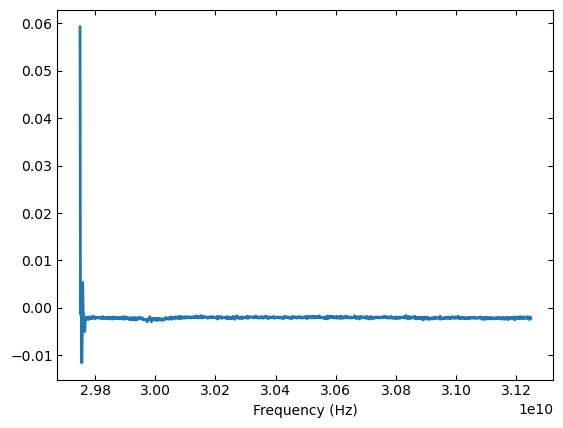

-0.002089989810340742

In [10]:
# percent difference plot
pct = diff/dyshnod
pct.plot()
np.nanmedian(pct.data)

## With equal weights instead


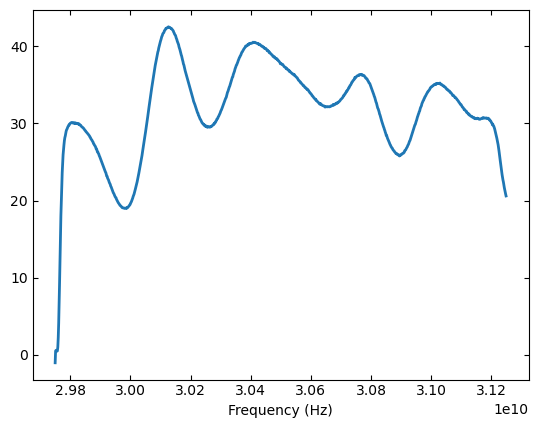

TPSCAN nrows = 96
# scanrows 96, # calrows ON 48  # calrows OFF 48
TPSCAN nrows = 92
# scanrows 92, # calrows ON 46  # calrows OFF 46
TPSCAN nrows = 240
# scanrows 240, # calrows ON 120  # calrows OFF 120


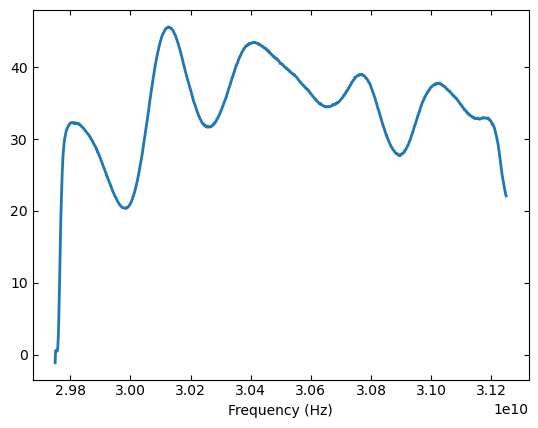

In [11]:
weights=None
# this assumes $PWD is /home/dysh
fn=get_pkg_data_filename("src/dysh/spectra/tests/data/TRCO_230413_Ka_snodka_43_ifnum_0_plnum_0_fdnum_1.fits")
gbt = GBTFITSLoad(fn)
idlsnod=gbt.getspec(0)
idlsnod.plot()
dyshnod=pnod.subbeamnod(scan=scan,ifnum=ifnum,plnum=plnum,fdnum=fdnum,weights=weights,calibrate=True)
dyshnod._unit = u.ct ## need to fix this in code
dyshnod.plot()

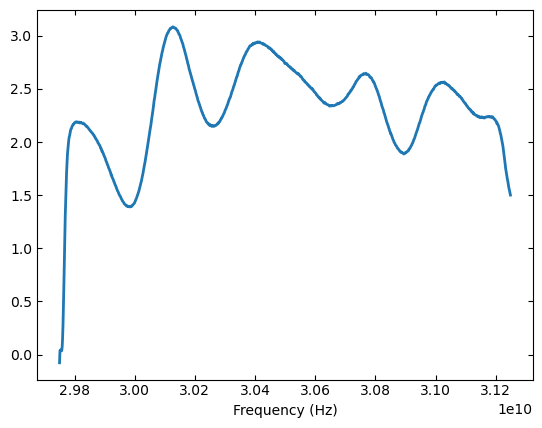

2.3636399829885306

In [12]:
diff = dyshnod-idlsnod
diff.plot()
np.nanmedian(diff.data)

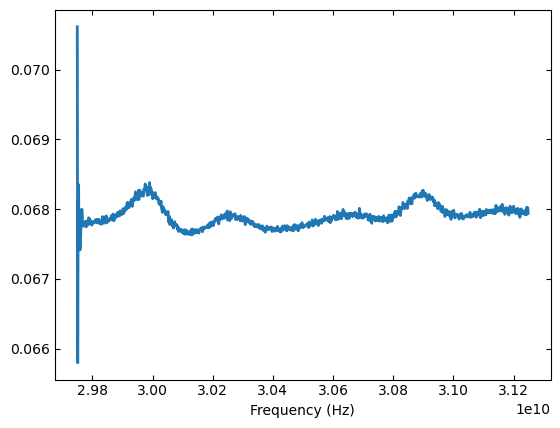

0.06789157411158986

In [13]:
pct = diff/dyshnod
pct.plot()
np.nanmedian(pct.data)

### This is what the subbeamnod code does
----------------------------------------

TPSCAN nrows = 240
# scanrows 240, # calrows ON 120  # calrows OFF 120
TPSCAN nrows = 96
# scanrows 96, # calrows ON 48  # calrows OFF 48
TPSCAN nrows = 92
# scanrows 92, # calrows ON 46  # calrows OFF 46


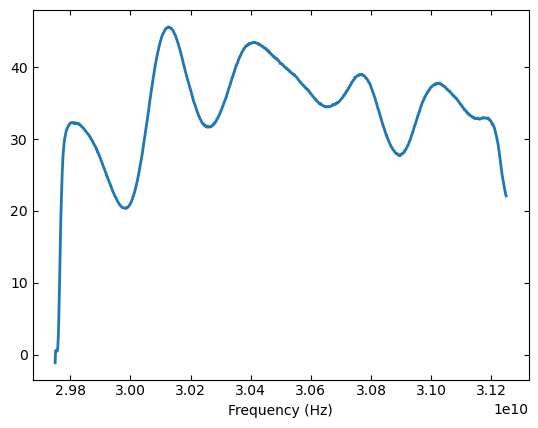

2.3636399829885306

In [14]:
tpp = pnod.gettp(scan,sig=None,cal=None,bintable=bintable,fdnum=fdnum,plnum=plnum,ifnum=ifnum)
tpon  = pnod.gettp(scan,sig=None,cal=None,bintable=bintable,fdnum=fdnum,plnum=plnum,ifnum=ifnum,subref=-1)
tpoff = pnod.gettp(scan,sig=None,cal=None,bintable=bintable,fdnum=fdnum,plnum=plnum,ifnum=ifnum,subref=1)
on  =  tpon.timeaverage(weights=weights)
off = tpoff.timeaverage(weights=weights)
n=tpp.timeaverage(weights).meta['TSYS']*(on-off)/off
n.plot()
np.nanmedian(n.data-idlsnod.data)

In [15]:
# write a file for pytest test_scan.py
# pnod.write_scans("/tmp/TRCO_230413_Ka_scan43.fits",scans=[43],overwrite=True)